# HW 1
Name: Xihao Cao

ID: U54244272


Date: 09/25/2022


## Task1
### (1) Show the images selected

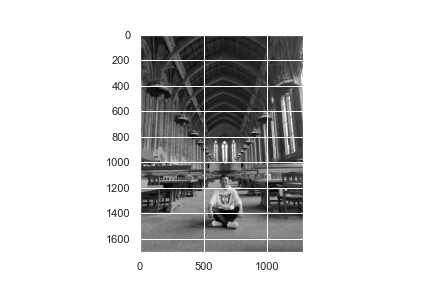

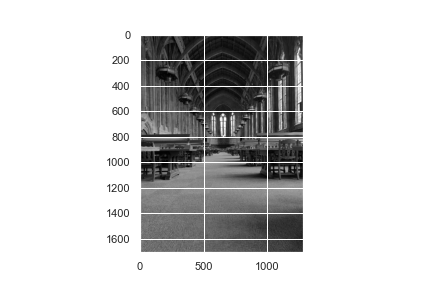

In [270]:
# Task 1
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
%matplotlib widget
#reference: https://datacarpentry.org/image-processing/05-creating-histograms/

# read the images
withme = skimage.io.imread(fname = "withme.png", as_gray = True)
withoutme = skimage.io.imread(fname = "withoutme.png", as_gray = True)

# disply the images
fig, ax = plt.subplots()
plt.imshow(withme, cmap = "gray")
fig, ax = plt.subplots()
plt.imshow(withoutme, cmap = "gray")

The two imgaes selected are ploted above, the first one is me sitting on the library floor, while the other is the same place without me.

### (2) Plot the gray scale histograms of two images

In [271]:
#hiscount stores the count of each gray scale from 0-255, binedges stores the bin boundaries info
hiscount1, bin_edges1 = np.histogram(withme, bins = 256, range = (0, 1))
hiscount2, bin_edges2 = np.histogram(withoutme, bins = 256, range = (0, 1))

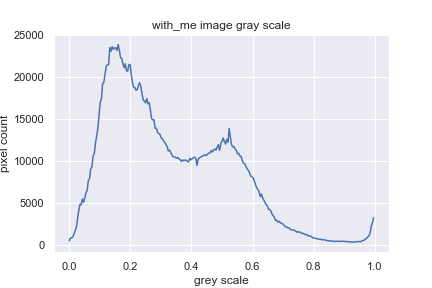

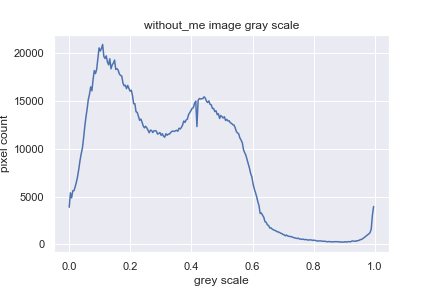

In [272]:
#plot the gray scale histograms
plt.figure()
plt.title("with_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.plot(bin_edges1[0:-1], hiscount1)

plt.figure()
plt.title("without_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.plot(bin_edges2[0:-1], hiscount2)

In the two plots above I plot the gray scale frequency distributions of two images, as we can see, there is not much difference between them.

(array([ 3881.,  5388.,  4864.,  5601.,  5610.,  6026.,  6504.,  7082.,
         7860.,  8727.,  9448., 10027., 11055., 12264., 13294., 14141.,
        15152., 15695., 16467., 16052., 17239., 18170., 17856., 18296.,
        19433., 20534., 20212., 20479., 20898., 19656., 19428., 19704.,
        19075., 18766., 19403., 18357., 18757., 18953., 19265., 18287.,
        18359., 18208., 17813., 17661., 17606., 16870., 16570., 16640.,
        16275., 16614., 16296., 16013., 16113., 15568., 14701., 14703.,
        13863., 13790., 13377., 12965., 13103., 12784., 12377., 12180.,
        12347., 12173., 11938., 11668., 11938., 11903., 11691., 11861.,
        11888., 11838., 11529., 11592., 11686., 11397., 11568., 11313.,
        11202., 11566., 11410., 11525., 11528., 11685., 11819., 11834.,
        11806., 11872., 11922., 11826., 12142., 12067., 12221., 12489.,
        12898., 12745., 13014., 13094., 13568., 13775., 13985., 14229.,
        14285., 14743., 14972., 12312., 15058., 15247., 15194., 

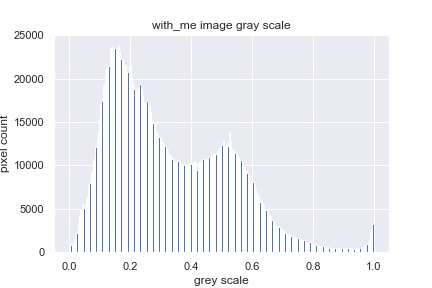

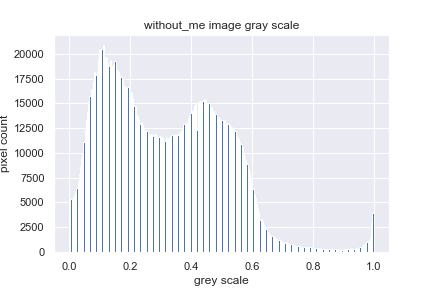

In [273]:
# try another plot function
with_gray = withme.flatten()
plt.figure()
plt.title("with_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.hist(with_gray, bins=256, range=(0, 1))

without_gray = withoutme.flatten()
plt.figure()
plt.title("without_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.hist(without_gray, bins=256, range=(0, 1))

The two plots above are also the gray scale distributions of the two images, but in a histogram format.

### (3) calculated the kl div, js div, and conduct ks test on the images

In [274]:
# calculate KL-div
def kl_divergence(p, q):
    # normalise
    p = 1.0*p / np.sum(p, axis=0)
    q = 1.0*q / np.sum(q, axis=0)
    #additional check to not divide by zero
    return np.sum(np.where((p != 0) & (q != 0), p * np.log(p / q), 0))


# calculate JS-div
def js_divergence(p,q):
    p = 1.0*p / np.sum(p, axis=0)
    q = 1.0*q / np.sum(q, axis=0)
    m = 0.5 * (p + q)
    js = (kl_divergence(p, m) + kl_divergence(q, m))/2
    return js

print(kl_divergence(with_gray, without_gray))
print(kl_divergence(without_gray, with_gray))

print(js_divergence(with_gray, without_gray))
print(js_divergence(without_gray, with_gray))


# perform Kolmogorov-Smirnov Test
from scipy.stats import kstest
print(kstest(with_gray, without_gray))

/var/folders/dm/4c8gs1vn1t7brq1lhj0fj1cc0000gn/T/ipykernel_14523/2280212357.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(np.where((p != 0) & (q != 0), p * np.log(p / q), 0))
/var/folders/dm/4c8gs1vn1t7brq1lhj0fj1cc0000gn/T/ipykernel_14523/2280212357.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where((p != 0) & (q != 0), p * np.log(p / q), 0))
/var/folders/dm/4c8gs1vn1t7brq1lhj0fj1cc0000gn/T/ipykernel_14523/2280212357.py:7: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where((p != 0) & (q != 0), p * np.log(p / q), 0))


0.33075205822183734
0.32174107266354685
0.07207435666194287
0.07207435666194287
KstestResult(statistic=0.06991592174677608, pvalue=0.0)


The kl-div(with me || without me) is 0.33075205822183734, while the kl-div(without me || with me) is 0.32174107266354685, which are relative small since the two images seleceted are very similar.

The js-div(with me || without me) = js-div(without me || with me) = 0.07207435666194287, which is also not big, also states that the two images are fairly similar in gray scale.

The KS test gives us a statistic = 0.06991592174677608 with pvalue = 0.0, also supports the viewpoint that two images are similar.

## Task 2
### (1) Simulate 3D data

In [291]:
# reference: https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e
import numpy as np
import sklearn.mixture as skm
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Generate synthetic data
N,D = 200, 3 # number of points and dimenstinality


means = np.array([[0.4, 0.3, 0.4],
                  [0, 0.5, 0.5],
                  [0.7, 0.7, 0.4]])
covs = np.array([np.diag([0.01, 0.01, 0.03]),
                 np.diag([0.01, 0.05, 0.01]),
                 np.diag([0.03, 0.07, 0.01])])
n_gaussians = means.shape[0]

# Next, we generate points using a multivariate normal distribution

points = []
for i in range(n_gaussians):
    x = np.random.multivariate_normal(means[i], covs[i], N )
    points.append(x)
points = np.concatenate(points)

### (2) Cluster the data using Guassian Mixture Modeling with EM

In [292]:
#reference: https://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
#fit the gaussian models with 1, 5, 30 iterations

gmm1 = skm.GaussianMixture(n_components=n_gaussians, covariance_type='diag', max_iter = 5)
gmm1.fit(points)

gmm2 = skm.GaussianMixture(n_components=n_gaussians, covariance_type='diag', max_iter = 12)
gmm2.fit(points)

gmm3 = skm.GaussianMixture(n_components=n_gaussians, covariance_type='diag', max_iter = 30)
gmm3.fit(points)


/Users/xihaoc/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


GaussianMixture(covariance_type='diag', max_iter=30, n_components=3)

The itertation times of gmm1,2,3 are 5, 12, 30 respectively.

### （3）

In [277]:
# This is a visualization function used to plot the GMM
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os
# reference: https://github.com/sitzikbs/gmm_tutorial/blob/master/visualization.py

def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()
    
    
    
def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


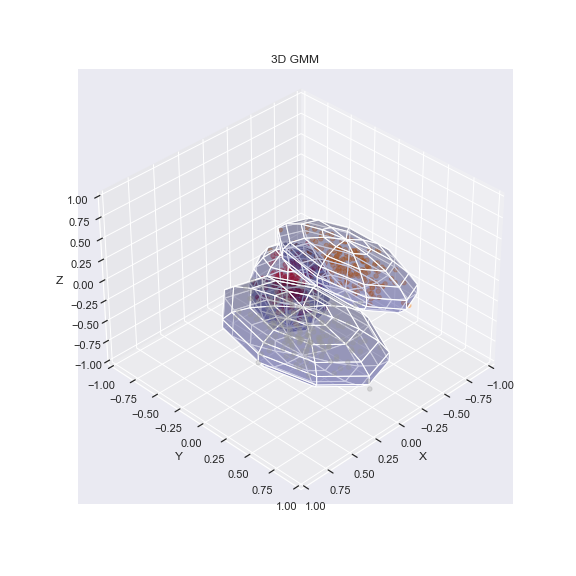

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


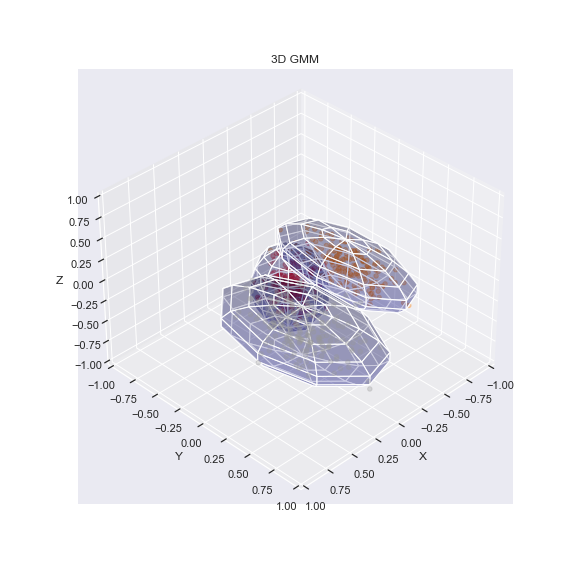

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


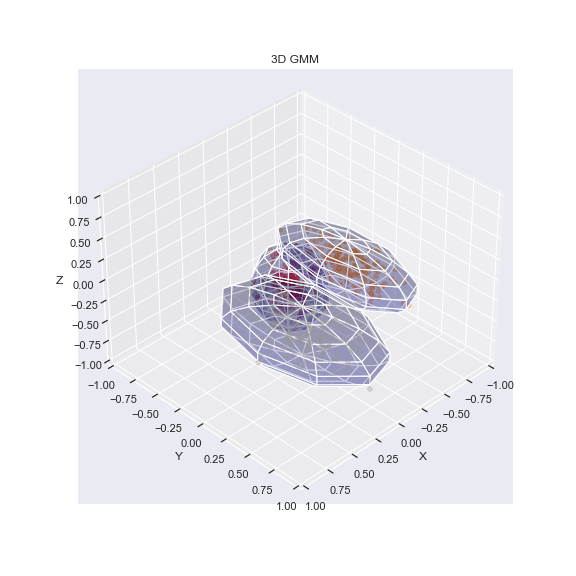

In [293]:
visualize_3d_gmm(points, gmm1.weights_, gmm1.means_.T, np.sqrt(gmm1.covariances_).T)

visualize_3d_gmm(points, gmm2.weights_, gmm2.means_.T, np.sqrt(gmm2.covariances_).T)

visualize_3d_gmm(points, gmm3.weights_, gmm3.means_.T, np.sqrt(gmm3.covariances_).T)

As we can see, as the EM iteration times increase, the model gets a better ability to cluster the data. However, since the simulated data are designed to have clear boundaries, so it does not need that much of iterations to get the optimal model, so the difference between each iterations are not huge.